In [ ]:
# Part 1

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns

# read .cvs file
authorInfo = pd.read_csv('authorInfo.csv');
articleInfo = pd.read_csv('articleInfo.csv');

part1 = pd.merge(authorInfo, articleInfo, on='Article No.', how='outer');
part1 = part1.fillna(0);

In [122]:
# print descriptive statistics of the data, including mean, standard deviation, median, etc.
basic_info = part1.describe()
basic_info

,Article No.,h-index,Year,Author Number,Citation
count,471.000000,471.000000,471.000000,471.000000,471.000000
mean,54.978769,3.278132,2020.823779,5.452229,25.910828
std,39.371006,8.929102,1.288553,3.683972,74.610624
min,1.000000,0.000000,2017.000000,0.000000,0.000000
25%,24.000000,0.000000,2020.000000,3.000000,2.000000
50%,50.000000,0.000000,2021.000000,5.000000,6.000000
75%,75.000000,0.000000,2022.000000,7.000000,18.000000
max,164.000000,95.000000,2022.000000,17.000000,662.000000


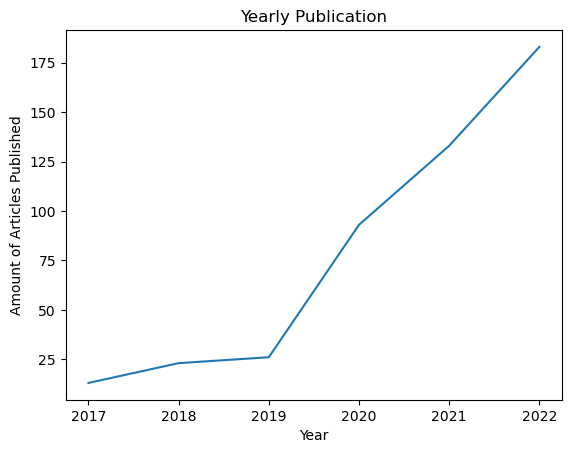

C:\Users\alexa\AppData\Local\Temp\ipykernel_1796\3533563309.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  articles_cited = part1.groupby('Year').sum()


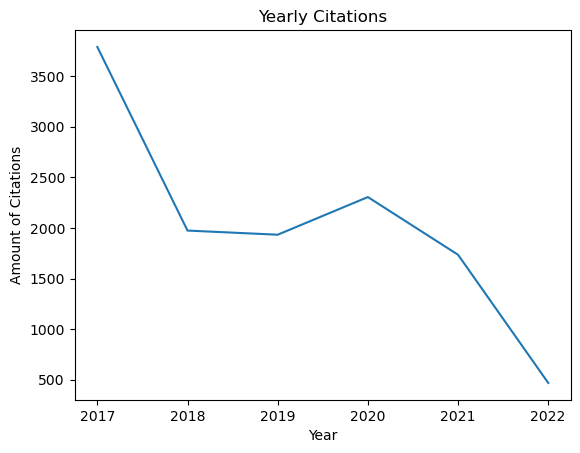

48.0


C:\Users\alexa\AppData\Local\Temp\ipykernel_1796\3533563309.py:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  publications = part1.groupby('Country').sum()


KeyError: 'Fiji'

In [103]:
# Articles Published
articles_published = part1.groupby('Year').count()
plt.plot(articles_published['Article No.'])
plt.title("Yearly Publication")
plt.xlabel("Year")
plt.ylabel("Amount of Articles Published")
plt.show()

# Articles Cited
articles_cited = part1.groupby('Year').sum()
plt.plot(articles_cited['Citation'])
plt.title("Yearly Citations")
plt.xlabel("Year")
plt.ylabel("Amount of Citations")
plt.show()

# Choropleth Map
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
publications = part1.groupby('Country').sum()
#print(publications)
print(publications.loc["Taiwan", "Author Number"])
for country in world['name']:
    world['Publications'] = publications.loc[country,'Author Number']
    
print(world['Publications'])
world.plot(column='Publications')




In [ ]:
# Part 2

In [105]:
part2 = pd.read_csv('data.csv')
part2 = part2.fillna(0)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN


In [111]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le = LabelEncoder()

le.fit(part2['ASR_Error'])
part2['ASR_Error'] = le.transform(part2['ASR_Error'])

le.fit(part2['Intent_Error'])
part2['Intent_Error'] = le.transform(part2['Intent_Error'])

le.fit(part2['Duration'])
part2['Duration'] = le.transform(part2['Duration'])

le.fit(part2['Gender'])
part2['Gender'] = le.transform(part2['Gender'])

le.fit(part2['Purchase'])
part2['Purchase'] = le.transform(part2['Purchase'])

In [115]:
# Pearson: standard correlation coefficient
part2.corr(method='pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration        0.012356
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Unnamed: 6           NaN
Name: SUS, dtype: float64

C:\Users\alexa\AppData\Local\Temp\ipykernel_1796\1520233205.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=part2['SUS'], palette='bright')


<function matplotlib.pyplot.show(close=None, block=None)>

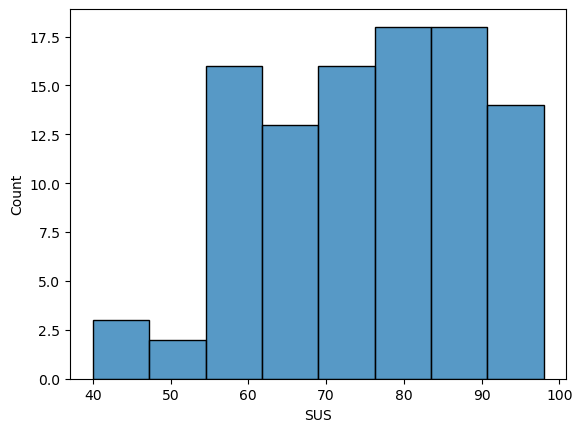

In [123]:
sns.histplot(data=part2['SUS'], palette='bright')
plt.show

In [ ]:
# Part 3

In [125]:
part3 = part2

y = part3['Purchase'].to_numpy()
y

x = part3.drop('Purchase', axis = 1).to_numpy()
x

array([[84., 69.,  0.,  3.,  2.,  0.],
       [58., 68.,  0.,  6.,  9.,  0.],
       [56., 36.,  1.,  6.,  8.,  0.],
       [55.,  2.,  0., 11.,  7.,  0.],
       [95., 74.,  0.,  2.,  3.,  0.],
       [71., 33.,  1.,  8.,  9.,  0.],
       [76., 27.,  1.,  6.,  3.,  0.],
       [64., 11.,  0.,  6., 11.,  0.],
       [56., 39.,  0.,  9.,  9.,  0.],
       [96., 51.,  0., 11.,  4.,  0.],
       [56., 42.,  0.,  9.,  7.,  0.],
       [80., 64.,  0.,  4.,  4.,  0.],
       [72., 15.,  1.,  7.,  9.,  0.],
       [81., 30.,  0.,  2.,  3.,  0.],
       [72., 77.,  0.,  7.,  3.,  0.],
       [66., 37.,  0.,  8.,  9.,  0.],
       [89., 44.,  1.,  3.,  5.,  0.],
       [80., 62.,  0.,  3.,  4.,  0.],
       [66., 14.,  0.,  9.,  9.,  0.],
       [74., 66.,  0.,  6.,  8.,  0.],
       [74., 23.,  1.,  6.,  8.,  0.],
       [68., 76.,  0.,  6., 11.,  0.],
       [96., 47.,  0.,  2.,  4.,  0.],
       [98., 53.,  0.,  1.,  3.,  0.],
       [86., 38.,  1., 10.,  1.,  0.],
       [58., 65.,  0.,  9

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split

scale = StandardScaler()
scaled_X = scale.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3)

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, roc_curve, auc, classification_report

In [135]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [136]:
lc.fit(X_train, y_train)
svc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)

y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.95      1.00      0.98        20

    accuracy                           0.97        30
   macro avg       0.98      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30

              preci

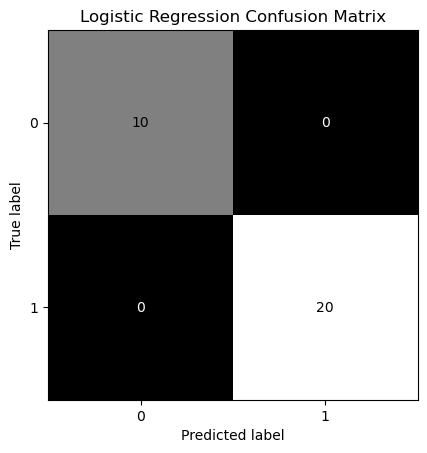

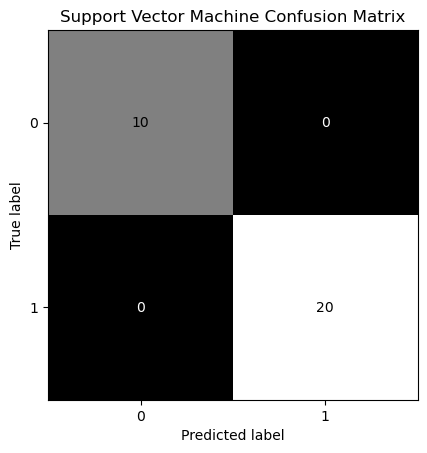

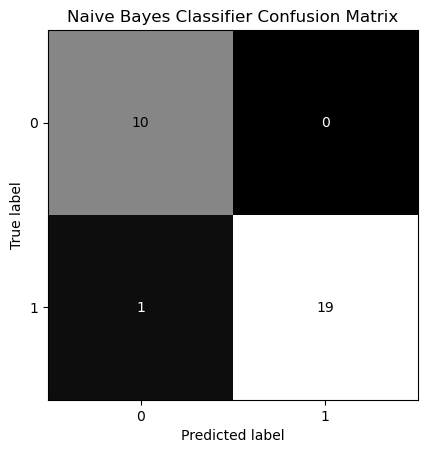

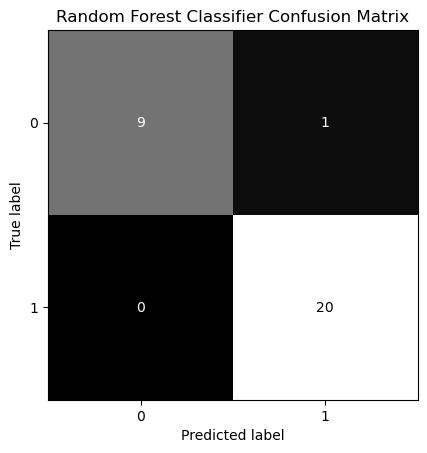

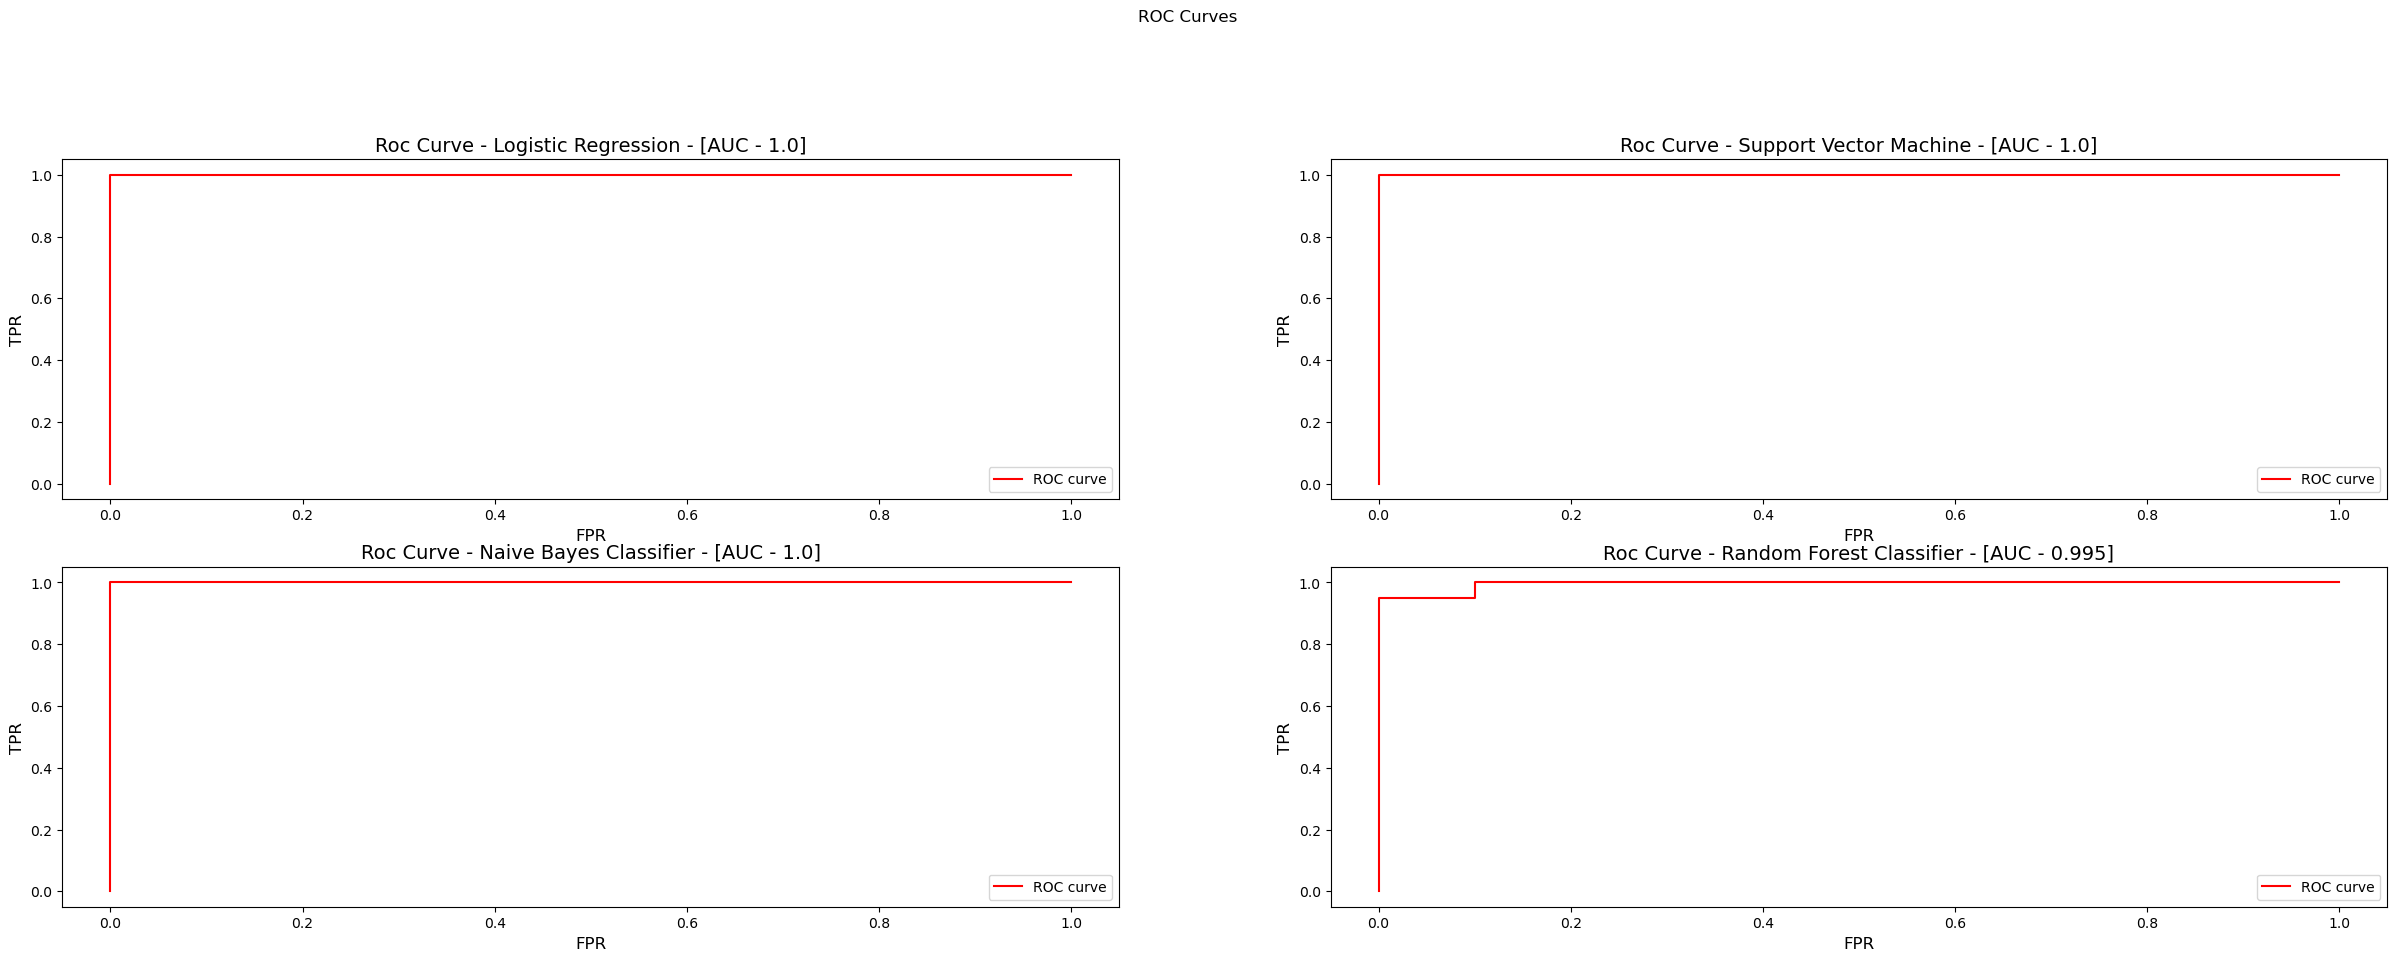

In [145]:
print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR', fontsize=12)
    plt.legend()
    plot_index += 1
plt.show()

In [141]:
from imblearn.over_sampling import SMOTE

In [142]:
oversample = SMOTE()
over_sampled_X_train, over_sampled_y_train = oversample.fit_resample(X_train, y_train)

In [143]:
lc = LogisticRegression()
svc = SVC(probability=True)
nbc = GaussianNB()
rfc = RandomForestClassifier()

In [ ]:
lc.fit(over_sampled_X_train, over_sampled_y_train)
neigh.fit(over_sampled_X_train, over_sampled_y_train)
svc.fit(over_sampled_X_train, over_sampled_y_train)
nbc.fit(over_sampled_X_train, over_sampled_y_train)
rfc.fit(over_sampled_X_train, over_sampled_y_train)

In [ ]:
y_lc_predicted = lc.predict(X_test)
y_lc_pred_proba = lc.predict_proba(X_test)


y_svc_predicted = svc.predict(X_test)
y_svc_pred_proba = svc.predict_proba(X_test)

y_nbc_predicted = nbc.predict(X_test)
y_nbc_pred_proba = nbc.predict_proba(X_test)

y_rfc_predicted = rfc.predict(X_test)
y_rfc_pred_proba = rfc.predict_proba(X_test)

print(classification_report(y_test, y_lc_predicted))
print(classification_report(y_test, y_svc_predicted))
print(classification_report(y_test, y_nbc_predicted))
print(classification_report(y_test, y_rfc_predicted))

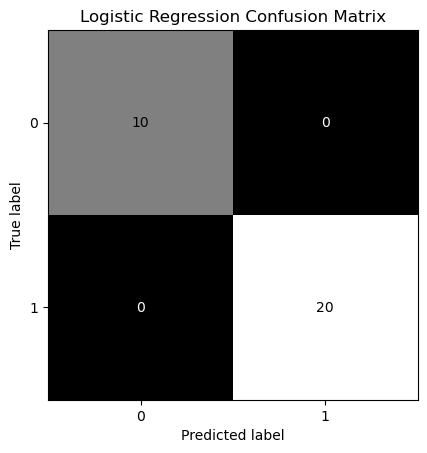

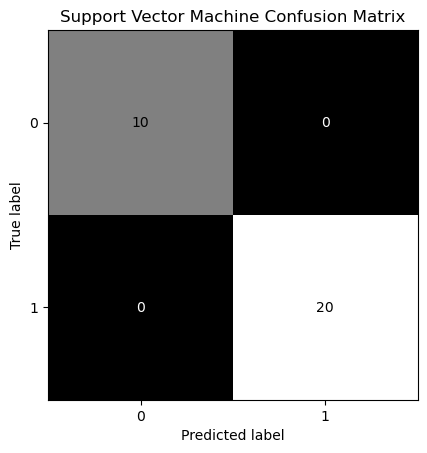

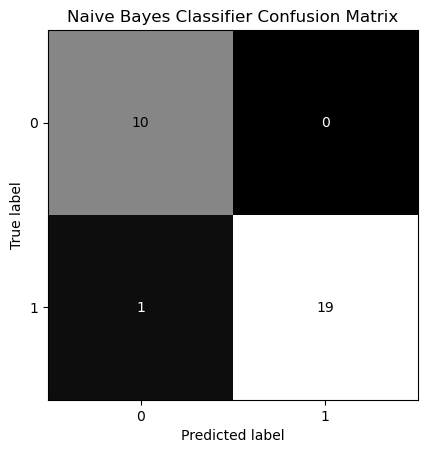

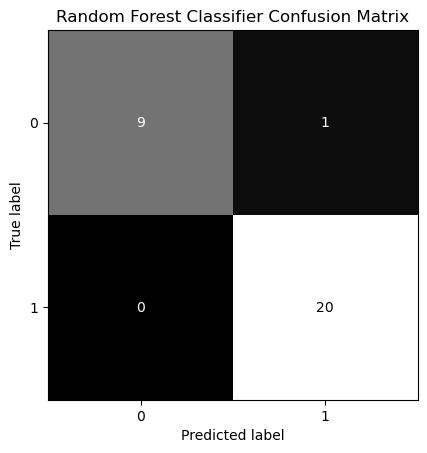

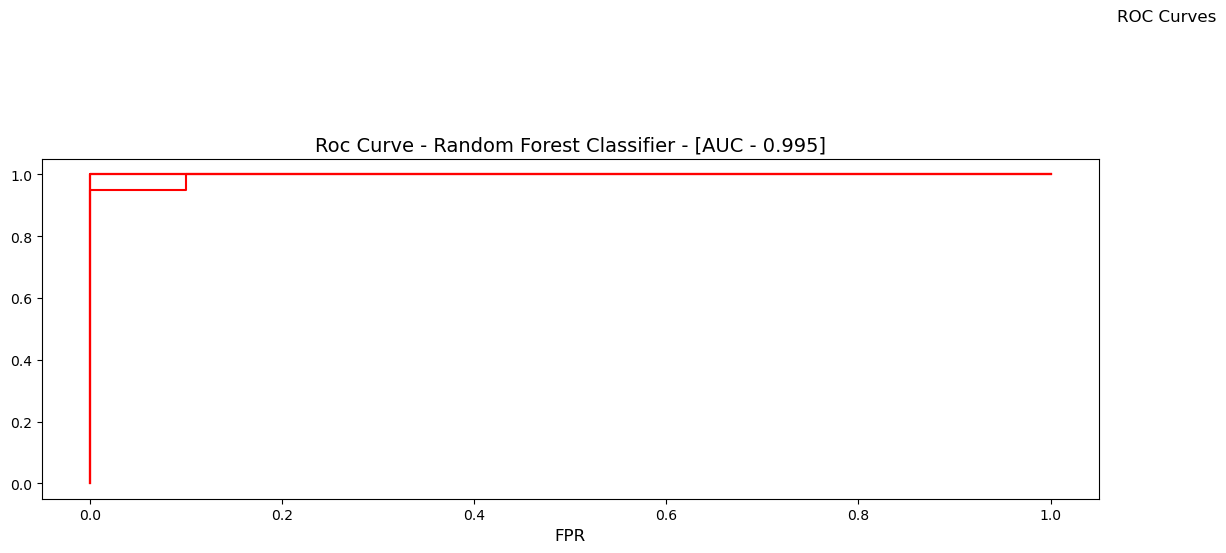

In [146]:
models = ['Logistic Regression', 'Support Vector Machine', 'Naive Bayes Classifier', 'Random Forest Classifier']
predictions = [y_lc_predicted, y_knn_predicted, y_svc_predicted, y_nbc_predicted, y_rfc_predicted]
pred_probabilities = [y_lc_pred_proba, y_knn_pred_proba, y_svc_pred_proba, y_nbc_pred_proba, y_rfc_pred_proba]

plot = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test.ravel(), prediction))
    disp.plot(
        include_values=True,
        cmap='gray',
        colorbar=False
    )
    disp.ax_.set_title(f"{model} Confusion Matrix")

plt.figure(figsize=(30, 15))
plt.suptitle("ROC Curves")
plot_index = 1

for model, prediction, pred_proba in zip(models, predictions, pred_probabilities):
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
    auc_score = auc(fpr, tpr)
    plt.subplot(3, 2, plot_index)
    plt.plot(fpr, tpr, 'r', label='ROC curve')
    # pyplot.figure(figsize=(5, 5))
    plt.title(f'Roc Curve - {model} - [AUC - {auc_score}]', fontsize=14)
    plt.xlabel('FPR', fontsize=12)